In [394]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
import numpy as np

In [495]:
databeyond = pd.read_csv("CleanedNFL")
datausa = pd.read_csv("CleanedNFLJustUSA")
cities = pd.read_csv("big_cities_without_a_team.csv")

,Unnamed: 0,tweet_count,City,tweet,date,hashtags,link,tweet_clean,tweet_words,hashtags_clean,hashtags_words
0,0,0,Mexico City,"De acuerdo con información de ESPN, la #NFL es...",2019-11-22 23:45:58+00:00,#NFL,https://twitter.com/tonitoNunez/status/1198024...,de acuerdo con información de espn la nfl esta...,"['por', 'football', 'interesados', 'azteca', '...",NFL,['NFL']
1,1,1,Mexico City,Ultima oportunidad para Carson Wentz y #FlyEag...,2019-11-22 22:54:57+00:00,#FlyEaglesFly #RitualNFL #NFL #NFL100 #Seahawk...,https://twitter.com/quiquegaray/status/1198012...,ultima oportunidad para carson wentz y flyeagl...,"['carson', 'para', 'ritualnfl', 'wentz', 'flye...",FlyEaglesFly RitualNFL NFL NFL100 Seahawkspic,"['RitualNFL', 'NFL', 'FlyEaglesFly', 'Seahawks..."
2,2,2,Mexico City,#FelizViernesATodos Te compartimos la agenda d...,2019-11-22 13:06:28+00:00,#FelizViernesATodos #NFL #MultimediosDeportes ...,https://twitter.com/telediario/status/11978639...,felizviernesatodos te compartimos la agenda de...,"['partidos', 'endirecto', 'más', 'te', 'de', '...",FelizViernesATodos NFL MultimediosDeportes EnD...,"['MultimediosDeportes', 'EnDirecto', 'NFL', 'F..."
3,3,3,Mexico City,¡Arranca @FOXImpactoNFL! #Colts vs #WeAreTexan...,2019-11-22 00:28:06+00:00,#Colts #WeAreTexans #NFLxFOX #NFL100 #NFL,https://twitter.com/eleonbaz/status/1197673070...,¡arranca foximpactonfl colts vs wearetexans a ...,"['es', 'inicio', '¡arranca', 'pictwittercomkb8...",Colts WeAreTexans NFLxFOX NFL100 NFL,"['Colts', 'NFL', 'WeAreTexans', 'NFLxFOX', 'NF..."
4,4,4,Mexico City,#Colts vs #WeAreTexans @WinOnFireInt https://b...,2019-11-21 23:51:38+00:00,#Colts #WeAreTexans #WinOnFire #Apuestas #Apue...,https://twitter.com/eleonbaz/status/1197663894...,colts vs wearetexans winonfireint httpsbitly2n...,['httpstwittercomeleonbazstatus119764864434378...,Colts WeAreTexans WinOnFire Apuestas ApuestasD...,"['Colts', 'Betting', 'ApuestasDeportivas', 'Ap..."


In [396]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [397]:
databeyond['tw_sentiment_neg'] = databeyond['tweet'].apply(lambda x :analyser.polarity_scores(x)['neg'])
databeyond['tw_sentiment_neu'] = databeyond['tweet'].apply(lambda x :analyser.polarity_scores(x)['neu'])
databeyond['tw_sentiment_pos'] = databeyond['tweet'].apply(lambda x :analyser.polarity_scores(x)['pos'])
databeyond['ht_sentiment_neg'] = databeyond['hashtags_clean'].apply(lambda x :analyser.polarity_scores(x)['neg'])
databeyond['ht_sentiment_neu'] = databeyond['hashtags_clean'].apply(lambda x :analyser.polarity_scores(x)['neu'])
databeyond['ht_sentiment_pos'] = databeyond['hashtags_clean'].apply(lambda x :analyser.polarity_scores(x)['pos'])

datausa['tw_sentiment_neg'] = datausa['tweet'].apply(lambda x :analyser.polarity_scores(x)['neg'])
datausa['tw_sentiment_neu'] = datausa['tweet'].apply(lambda x :analyser.polarity_scores(x)['neu'])
datausa['tw_sentiment_pos'] = datausa['tweet'].apply(lambda x :analyser.polarity_scores(x)['pos'])
datausa['ht_sentiment_neg'] = datausa['hashtags_clean'].apply(lambda x :analyser.polarity_scores(x)['neg'])
datausa['ht_sentiment_neu'] = datausa['hashtags_clean'].apply(lambda x :analyser.polarity_scores(x)['neu'])
datausa['ht_sentiment_pos'] = datausa['hashtags_clean'].apply(lambda x :analyser.polarity_scores(x)['pos'])

In [398]:
sentnotusa = databeyond.groupby(by = 'City').mean()
sentusa = datausa.groupby(by = 'City').mean()

In [399]:
sentnotusa.sort_values(by = 'tw_sentiment_pos', ascending = False)
sentnotusa.sort_values(by = 'ht_sentiment_pos', ascending = False)

,Unnamed: 0,tweet_count,tw_sentiment_neg,tw_sentiment_neu,tw_sentiment_pos,ht_sentiment_neg,ht_sentiment_neu,ht_sentiment_pos
City,,,,,,,,
Toronto,1281.0,209.0,0.048735,0.870847,0.080430,0.004325,0.969921,0.025754
Montreal,1560.0,69.0,0.041525,0.876388,0.082115,0.000000,0.976770,0.023230
Mexico City,249.5,249.5,0.019524,0.968530,0.011948,0.001994,0.982044,0.015962
Paris,1035.5,35.5,0.036139,0.914986,0.048861,0.000000,0.988194,0.011806
London,749.5,249.5,0.025194,0.888076,0.086726,0.007292,0.981694,0.011014
Madrid,2027.0,91.0,0.003273,0.974503,0.022224,0.000650,0.993426,0.005923
Vancouver,1730.0,100.0,0.032592,0.869851,0.097567,0.000000,0.995552,0.004448
Barcelona,1905.0,30.0,0.016689,0.962164,0.021148,0.000000,0.996590,0.003410
Lisbon,1867.5,6.5,0.007286,0.979571,0.013143,0.000000,1.000000,0.000000


In [400]:
sentusa.sort_values(by = 'tw_sentiment_pos', ascending = False)
sentusa.sort_values(by = 'ht_sentiment_pos', ascending = False)

,Unnamed: 0,tweet_count,tw_sentiment_neg,tw_sentiment_neu,tw_sentiment_pos,ht_sentiment_neg,ht_sentiment_neu,ht_sentiment_pos
City,,,,,,,,
Baton Rouge,31463.0,44.0,0.019157,0.911843,0.068989,0.007292,0.901899,0.090809
Lexington-Fayette,22017.0,13.0,0.025889,0.916741,0.057333,0.000000,0.924444,0.075556
Corpus Christi,21986.5,16.5,0.028235,0.868500,0.103265,0.000000,0.934941,0.065059
Raleigh,16337.0,74.0,0.047523,0.852993,0.099490,0.000000,0.942799,0.057201
Laredo,27988.5,10.5,0.022136,0.950273,0.027591,0.000000,0.945000,0.055000
...,...,...,...,...,...,...,...,...
Cincinnati,22838.5,162.5,0.055163,0.857298,0.087540,0.004199,0.993218,0.002583
Oklahoma City,11959.5,74.5,0.061640,0.832767,0.105593,0.002540,0.994987,0.002473
Bakersfield,19579.0,13.0,0.027556,0.899185,0.073222,0.013444,0.986556,0.000000


In [401]:
NFL_Cities = ['Los Angeles', 'Denver', 'Kansas City', 'Oakland', 'Phoenix', 'San Francisco', 'Seattle', 'Atlanta', 'Charlotte', 'New Orleans', 'Tampa Bay', 'Houston', 'Jacksonville', 'Nashville', 'Indianapolis', 'Chicago', 'Detroit', 'Minneapolis', 'St. Paul', 'Pittsburgh', 'Cleveland', 'Cincinatti', 'Baltimore', 'Dallas', 'Fort Worth', 'New York', 'Philadelphia', 'Washington', 'Buffalo', 'Miami', 'Boston']

In [402]:
datasets = [datausa, databeyond]
NFLCitiesData = pd.DataFrame(columns = datausa.columns)
NotNFLCitiesData = pd.DataFrame(columns = datausa.columns)
for dataset in datasets:
    for i in range(0,len(dataset)):
        row = dataset.iloc[i:i+1]
        if row['City'].values[0] in NFL_Cities:
            NFLCitiesData = NFLCitiesData.append(row)
        elif row['City'].values[0]  not in NFL_Cities:
            NotNFLCitiesData = NotNFLCitiesData.append(row)
        
                   

In [403]:
sentnotnfl = NotNFLCitiesData.groupby(by = 'City').mean()
sentnfl = NFLCitiesData.groupby(by = 'City').mean()

In [404]:
notnfl = sentnotnfl.sort_values(by = 'tw_sentiment_pos', ascending = False)[:20]
notnfl

,tw_sentiment_neg,tw_sentiment_neu,tw_sentiment_pos,ht_sentiment_neg,ht_sentiment_neu,ht_sentiment_pos
City,,,,,,
Anchorage,0.044571,0.817429,0.138000,0.037429,0.946929,0.015643
Fresno,0.064345,0.811483,0.124207,0.005983,0.972345,0.021672
Greensboro,0.039650,0.838415,0.121943,0.005276,0.959634,0.035089
Long Beach,0.032816,0.846148,0.121028,0.009870,0.983262,0.006868
Tucson,0.041767,0.841167,0.117050,0.000000,0.961600,0.038400
Oklahoma City,0.061640,0.832767,0.105593,0.002540,0.994987,0.002473
San Bernardino,0.051297,0.843804,0.104873,0.011741,0.966481,0.021778
Madison,0.058660,0.836698,0.104623,0.009283,0.976811,0.013906
Riverside,0.050304,0.845960,0.103719,0.011062,0.964540,0.024397


In [405]:
#AllCitiesSent = sentnotnfl.append(sentnfl)

In [406]:
#sentnfl.sort_values(by = 'tw_sentiment_pos', ascending = False)

In [407]:
nflpops = pd.read_csv('teams_with_stadium.csv', encoding = 'Latin-1')
nflpops = nflpops.set_index('city')
datausa.set_index('City', inplace = True)

In [408]:
cities.drop('Unnamed: 0', axis = 1, inplace = True)
nflpops.drop('Unnamed: 0', axis = 1, inplace = True)
datausa.drop('Unnamed: 0', axis = 1, inplace = True)

In [409]:
combinednfl = datausa.join(nflpops, how = 'inner')
combinednfl.reset_index(inplace = True)
cities.set_index('city', inplace = True)
databeyond.set_index('City', inplace = True)
NotNFLCitiesData.set_index('City', inplace = True)
combinednotnfl = NotNFLCitiesData.join(cities, how = 'inner')
combinednotnfl.reset_index(inplace = True)
combinednfl.rename(columns = {'index': 'City'}, inplace = True)
tobemergednfl = combinednfl[['tw_sentiment_neg', 'tw_sentiment_neu', 'tw_sentiment_pos', 'ht_sentiment_neg', 'ht_sentiment_neu', 'ht_sentiment_pos', 'population', 'City']]
tobemergednotnfl = combinednotnfl[['tw_sentiment_neg', 'tw_sentiment_neu', 'tw_sentiment_pos', 'ht_sentiment_neg', 'ht_sentiment_neu', 'ht_sentiment_pos', 'population', 'index']]
tobemergednotnfl.rename(columns = {'index': 'City'}, inplace = True)

C:\Users\blueh\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [415]:
final_df = tobemergednfl.append(tobemergednotnfl)
final_df_grouped = final_df.groupby(by = 'City').mean()

In [416]:
final_df_grouped.sort_values(by = 'tw_sentiment_pos', ascending = False)
final_df_grouped['combinedsentiment'] = final_df_grouped['tw_sentiment_pos'] + final_df_grouped['tw_sentiment_neg'] + final_df_grouped['ht_sentiment_pos'] + final_df_grouped['ht_sentiment_neg']
final_df_grouped.sort_values(by = 'combinedsentiment', ascending = False)

,tw_sentiment_neg,tw_sentiment_neu,tw_sentiment_pos,ht_sentiment_neg,ht_sentiment_neu,ht_sentiment_pos,population,combinedsentiment
City,,,,,,,,
Fresno,0.064345,0.811483,0.124207,0.005983,0.972345,0.021672,509924,0.216207
Raleigh,0.047523,0.852993,0.099490,0.000000,0.942799,0.057201,431746,0.204215
Memphis,0.071209,0.831615,0.097135,0.012486,0.964892,0.022622,653450,0.203453
Tucson,0.041767,0.841167,0.117050,0.000000,0.961600,0.038400,526116,0.197217
Louisville/Jefferson County,0.055429,0.846274,0.098343,0.023251,0.962731,0.014017,609893,0.191040
Baltimore,0.053696,0.846224,0.100064,0.008348,0.971324,0.020328,622104,0.182436
Albuquerque,0.067264,0.845311,0.087406,0.011642,0.973085,0.015274,556495,0.181585
San Diego,0.058230,0.842964,0.098806,0.009308,0.979414,0.011278,1355896,0.177622
Phoenix,0.052156,0.848080,0.099766,0.007390,0.975124,0.017486,1513367,0.176798


Text(0.5, 0, 'Passion Score')

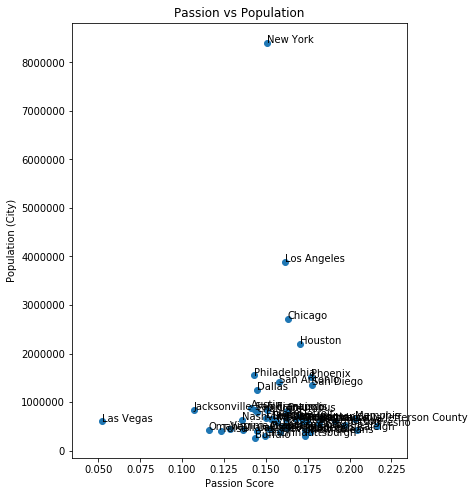

In [489]:
nobigmetro = final_df_grouped.drop(['New York', 'Los Angeles', 'Chicago'], axis = 0, inplace = False)
fig, ax = plt.subplots(figsize = (6,8))
ax.scatter(nobigmetro['combinedsentiment'], nobigmetro['population'])
for i, txt in enumerate(nobigmetro.index):
    ax.annotate(txt, (nobigmetro['combinedsentiment'][i], nobigmetro['population'][i]))
    
ax.set_title('Passion vs Population')
ax.set_ylabel('Population (City)')
ax.set_xlabel('Passion Score')

In [420]:
sentnotusa.drop(['Unnamed: 0', 'tweet_count'], axis = 1, inplace = True)
Population = [5515000, 504718, 8900000, 6550000, 8850000, 1780000, 2141000, 542298, 2930000, 675218]
sentnotusa['population'] = Population
sentnotusa['combinedsentiment'] = sentnotusa['tw_sentiment_pos'] + sentnotusa['tw_sentiment_neg'] + sentnotusa['ht_sentiment_pos'] + sentnotusa['ht_sentiment_neg']
sentnotusa

,tw_sentiment_neg,tw_sentiment_neu,tw_sentiment_pos,ht_sentiment_neg,ht_sentiment_neu,ht_sentiment_pos,population,combinedsentiment
City,,,,,,,,
Barcelona,0.016689,0.962164,0.021148,0.000000,0.996590,0.003410,5515000,0.041246
Lisbon,0.007286,0.979571,0.013143,0.000000,1.000000,0.000000,504718,0.020429
London,0.025194,0.888076,0.086726,0.007292,0.981694,0.011014,8900000,0.130226
Madrid,0.003273,0.974503,0.022224,0.000650,0.993426,0.005923,6550000,0.032071
Mexico City,0.019524,0.968530,0.011948,0.001994,0.982044,0.015962,8850000,0.049428
Montreal,0.041525,0.876388,0.082115,0.000000,0.976770,0.023230,1780000,0.146871
Paris,0.036139,0.914986,0.048861,0.000000,0.988194,0.011806,2141000,0.096806
Quebec,0.028933,0.922933,0.048100,0.000000,1.000000,0.000000,542298,0.077033
Toronto,0.048735,0.870847,0.080430,0.004325,0.969921,0.025754,2930000,0.159243


Text(0.5, 0, 'Passion Score')

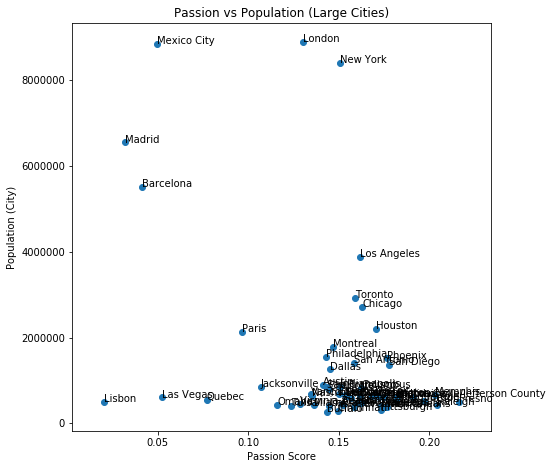

In [497]:
AllCitiesGrouped = final_df_grouped.append(sentnotusa)
fig, ax = plt.subplots(figsize = (7.5,7.5))

ax.scatter(AllCitiesGrouped['combinedsentiment'], AllCitiesGrouped['population'])
for i, txt in enumerate(AllCitiesGrouped.index):
    ax.annotate(txt, (AllCitiesGrouped['combinedsentiment'][i], AllCitiesGrouped['population'][i]))
ax.set_title('Passion vs Population (Large Cities)')
ax.set_ylabel('Population (City)')
ax.set_xlabel('Passion Score')

Text(0.5, 0, 'Passion Score')

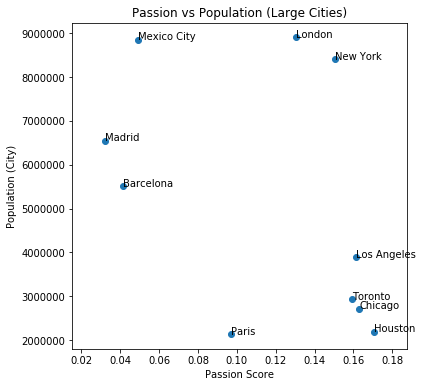

In [438]:
AllCitiesGrouped = final_df_grouped.append(sentnotusa)
fig, ax = plt.subplots(figsize = (6,6))

bigcities = AllCitiesGrouped[AllCitiesGrouped['population'] >= 2000000]
ax.scatter(bigcities['combinedsentiment'], bigcities['population'])
for i, txt in enumerate(bigcities.index):
    ax.annotate(txt, (bigcities['combinedsentiment'][i], bigcities['population'][i]))
ax.set_title('Passion vs Population (Large Cities)')
ax.set_ylabel('Population (City)')
ax.set_xlabel('Passion Score')

Text(0.5, 0, 'Positive Sentiment')

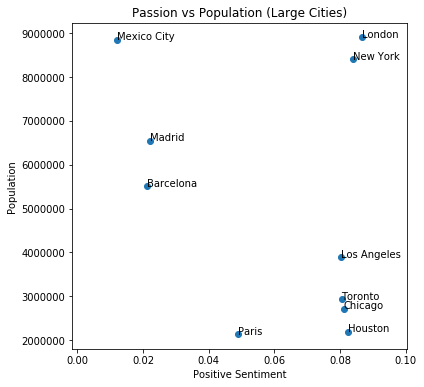

In [488]:
AllCitiesGrouped = final_df_grouped.append(sentnotusa)
fig, ax = plt.subplots(figsize = (6,6))

bigcities = AllCitiesGrouped[AllCitiesGrouped['population'] >= 2000000]
ax.scatter(bigcities['tw_sentiment_pos'], bigcities['population'])
for i, txt in enumerate(bigcities.index):
    ax.annotate(txt, (bigcities['tw_sentiment_pos'][i], bigcities['population'][i]))
ax.set_title('Passion vs Population (Large Cities)')
ax.set_ylabel('Population')
ax.set_xlabel('Positive Sentiment')

Text(0.5, 0, 'Passion Score')

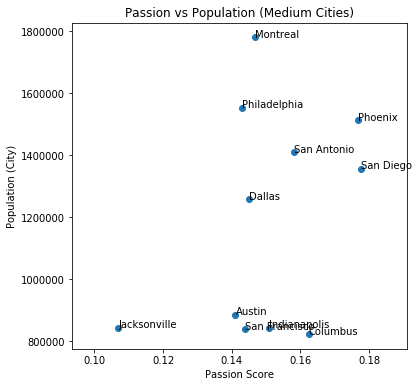

In [441]:
smallercities = AllCitiesGrouped[(AllCitiesGrouped['population'] <= 2000000) & (AllCitiesGrouped['population'] > 800000)]

fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(smallercities['combinedsentiment'], smallercities['population'])

for i, txt in enumerate(smallercities.index):
    ax.annotate(txt, (smallercities['combinedsentiment'][i], smallercities['population'][i]))
    
ax.set_title('Passion vs Population (Medium Cities)')
ax.set_ylabel('Population (City)')
ax.set_xlabel('Passion Score')

Text(0.5, 0, 'Passion Score')

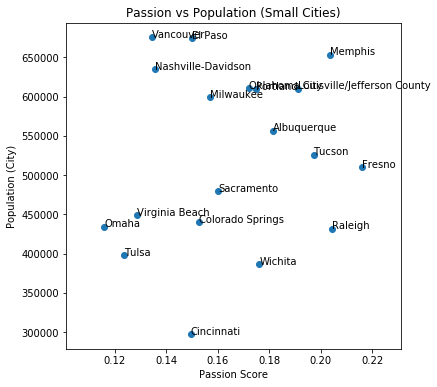

In [486]:
def IsNfl(s):
    if s in NFL_Cities:
        return True
    elif s not in NFL_Cities:
        return False
    else:
        return 'Error'
        

OtherAllCities = AllCitiesGrouped.reset_index(inplace = False)
OtherAllCities['City'] = OtherAllCities['City'].astype(str)
OtherAllCities['NFL?'] = OtherAllCities['City'].map(IsNfl)

smallestcities = OtherAllCities[(OtherAllCities['population'] <= 800000) & (OtherAllCities['NFL?'] == False) & (OtherAllCities['combinedsentiment'] >= 0.1)]
smallestcities.set_index('City', inplace = True)

fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(smallestcities['combinedsentiment'], smallestcities['population'])

for i, txt in enumerate(smallestcities.index):
    ax.annotate(txt, (smallestcities['combinedsentiment'][i], smallestcities['population'][i]))
    
ax.set_title('Passion vs Population (Small Cities)')
ax.set_ylabel('Population (City)')
ax.set_xlabel('Passion Score')